In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mdp

In [3]:
import ucrl2

In [19]:
import itertools

In [181]:
eps = 0.1
n_states = 20
n_actions = 2

In [182]:
m = mdp.RingMDP(n_states, eps)

In [183]:
m.r[-1] = 1

In [184]:
m.r

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.]])

In [13]:
m.p

array([[[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.9, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]],

       [[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.9, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.9, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.9, 0.1, 0. , 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.9, 0.1, 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.9, 0.1, 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0.1, 0. , 0. ]],

       [[0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0.1, 0. ]],

       [[0. , 0. , 0. , 

In [223]:
# Potentials
phi_1 = - (n_states - 1 - arange(n_states)) / eps
phi_2 = linspace(0, 1 / eps, n_states)

In [224]:
phi_2

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [225]:
# Potential-shaped rewards
r_phi = m.r.copy()
for st, ac in itertools.product(range(n_states), range(n_actions)):
    r_phi[st, ac] += (m.p[st, ac] * phi_2).sum() - phi_2[st]

In [226]:
r_phi

array([[0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [0.        , 0.05263158],
       [1.        , 0.        ]])

In [189]:
# Scale r_phi to [0, 1] with phi_1
# r_phi = (r_phi - r_phi.min()) / r_phi.ptp()

In [215]:
# Phi-shaped MDP
m_phi = mdp.SimpleMDP(n_states, n_actions, m.p, r_phi)

In [109]:
delta = 0.5

In [198]:
n_trajs = 10
len_trajs = 100000
trajs = []
for _ in range(n_trajs):
    tr = ucrl2.ucrl2(m, delta, initial_state=0)
    traj = []
    for _ in range(len_trajs):
        (t, st, ac, next_st, r) = next(tr)
        traj.append((t, st, ac, next_st, r))
    trajs.append(traj)

In [221]:
trajs[0][-20:]

[(99981, 14, 0, 14, 0.0),
 (99982, 14, 0, 14, 0.0),
 (99983, 14, 0, 14, 0.0),
 (99984, 14, 0, 14, 0.0),
 (99985, 14, 0, 14, 0.0),
 (99986, 14, 0, 14, 0.0),
 (99987, 14, 0, 14, 0.0),
 (99988, 14, 0, 14, 0.0),
 (99989, 14, 0, 14, 0.0),
 (99990, 14, 0, 14, 0.0),
 (99991, 14, 0, 14, 0.0),
 (99992, 14, 0, 14, 0.0),
 (99993, 14, 0, 14, 0.0),
 (99994, 14, 0, 14, 0.0),
 (99995, 14, 0, 14, 0.0),
 (99996, 14, 0, 14, 0.0),
 (99997, 14, 0, 14, 0.0),
 (99998, 14, 0, 14, 0.0),
 (99999, 14, 0, 14, 0.0),
 (100000, 14, 0, 14, 0.0)]

In [217]:
phi_trajs = []
for _ in range(n_trajs):
    tr = ucrl2.ucrl2(m_phi, delta, initial_state=0)
    traj = []
    for _ in range(len_trajs):
        (t, st, ac, next_st, r) = next(tr)
        traj.append((t, st, ac, next_st, r))
    phi_trajs.append(traj)

In [218]:
phi_trajs[0][-20:]

[(99981, 19, 0, 19, 1.0),
 (99982, 19, 0, 19, 1.0),
 (99983, 19, 0, 19, 1.0),
 (99984, 19, 0, 19, 1.0),
 (99985, 19, 0, 19, 1.0),
 (99986, 19, 0, 19, 1.0),
 (99987, 19, 0, 19, 1.0),
 (99988, 19, 0, 19, 1.0),
 (99989, 19, 0, 19, 1.0),
 (99990, 19, 0, 19, 1.0),
 (99991, 19, 0, 19, 1.0),
 (99992, 19, 0, 19, 1.0),
 (99993, 19, 0, 19, 1.0),
 (99994, 19, 0, 19, 1.0),
 (99995, 19, 0, 19, 1.0),
 (99996, 19, 0, 19, 1.0),
 (99997, 19, 0, 19, 1.0),
 (99998, 19, 0, 19, 1.0),
 (99999, 19, 0, 19, 1.0),
 (100000, 19, 0, 19, 1.0)]

In [99]:
def process_trajectory(trajectory, opt_avg_reward, replace_r=None):
    regrets = []
    per_step_regret = []
    tt = []
    acc_regret = 0
    for (t, st, ac, next_st, r) in trajectory:
        if replace_r is not None:
            r = replace_r[st, ac]
        acc_regret += opt_avg_reward - r
        regrets.append(acc_regret)
        per_step_regret.append(acc_regret / t)
        tt.append(t)

    sregret = np.asarray(regrets)
    per_step_regret = np.asarray(per_step_regret)
    tt = np.asarray(tt)
    return regrets, per_step_regret, tt

In [136]:
tt = arange(len_trajs) + 1

In [90]:
hitting_cost = (n_states - 1) / eps
bound = ucrl2.ucrl2_regret_bound(hitting_cost, n_states, n_actions, delta, tt)

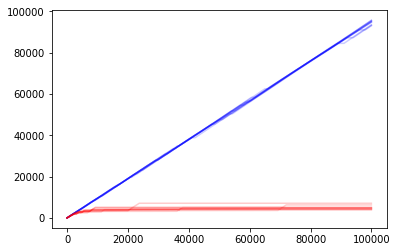

In [219]:
# plot(acc_regret)
# plot(bound, '--')
for traj in trajs:
    plot(process_trajectory(traj, 1)[0], alpha=0.2, c='b')
for traj in phi_trajs:
    plot(process_trajectory(traj, 1, replace_r=m.r)[0], alpha=0.2, c='r')

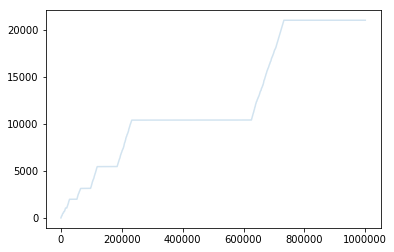

In [170]:
hitting_cost_phi = 1 / eps
# plot(ucrl2.ucrl2_regret_bound(hitting_cost_phi, n_states, n_actions, delta, tt))
for traj in phi_trajs:
    plot(process_trajectory(traj, 1)[0], alpha=0.2)

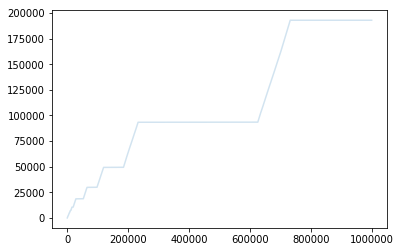

In [171]:
for traj in phi_trajs:
    plot(process_trajectory(traj, 1, replace_r=m.r)[0], alpha=0.2)

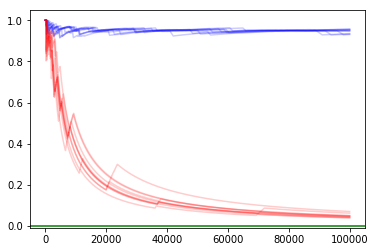

In [220]:
for traj in trajs:
    plot(process_trajectory(traj, 1)[1], alpha=0.2, c='b')
for traj in phi_trajs:
    plot(process_trajectory(traj, 1, replace_r=m.r)[1], alpha=0.2, c='r')
axhline(0, c='g')

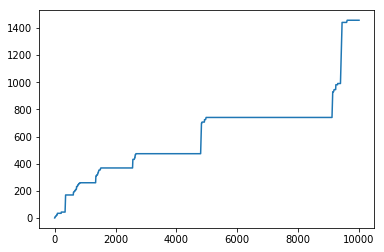

In [123]:
plot(process_trajectory(phi_trajs[0], 1)[0])

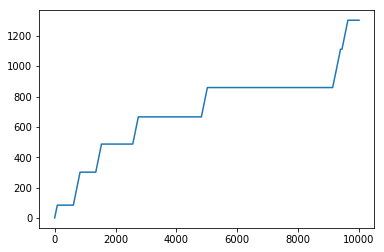

In [124]:
plot(process_trajectory(phi_trajs[0], 1, replace_r=m.r)[0])